<a href="https://colab.research.google.com/github/Mithunnnnn/DL-project/blob/main/Bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


232/232 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0132
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0021
Epoch 3/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0019
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0020
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0019
Epoch 6/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0015
Epoch 7/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0019
Epoch 8/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0015
Epoch 9/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0013
Epoch 10/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0018
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


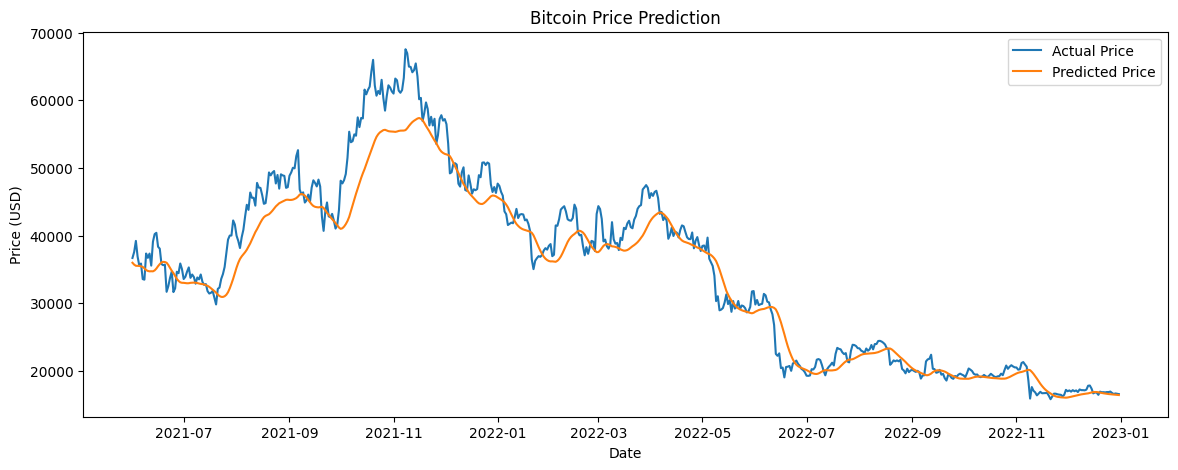

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Data Collection
data = yf.download('BTC-USD', start='2015-01-01', end='2023-01-01')
data = data[['Close']]  # Use only the closing price
data.reset_index(inplace=True)

# Step 2: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 30
X, y = create_sequences(scaled_data, SEQ_LENGTH)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 3: Build the Model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(10))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=10)

# Step 5: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform y_test
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Visualize Results
plt.figure(figsize=(14, 5))
plt.plot(data['Date'][train_size + SEQ_LENGTH:], y_test_inv, label='Actual Price')
plt.plot(data['Date'][train_size + SEQ_LENGTH:], predictions, label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
